#Loading the Dataset

Import the Data

In [2]:
# Import required libraries
import numpy as np
import pandas as pd

In [3]:
# Import the dataset
dataset = pd.read_csv('IMDB Dataset.csv',engine = 'python', error_bad_lines=False)
dataset.shape

(50000, 2)

Transforming Documents into Feature Vectors

In [4]:
#Transforming Documents into Feature Vectors
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = ([
         'The dog is running',
         'I like chocolates beacause it is sweet',
         'The dog is running and chocolate is sweet, and two and two is four'
])
bag = count.fit_transform(docs)
print(count.vocabulary_)
print(bag.toarray())

{'the': 11, 'dog': 4, 'is': 6, 'running': 9, 'like': 8, 'chocolates': 3, 'beacause': 1, 'it': 7, 'sweet': 10, 'and': 0, 'chocolate': 2, 'two': 12, 'four': 5}
[[0 0 0 0 1 0 1 0 0 1 0 1 0]
 [0 1 0 1 0 0 1 1 1 0 1 0 0]
 [3 0 1 0 1 1 3 0 0 1 1 1 2]]


Word Relevancy using TF-IDF

In [5]:
# Word Relevancy using TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)
tfidf = TfidfTransformer(use_idf = True, norm='l2', smooth_idf = True)
print(tfidf.fit_transform(bag).toarray())

[[0.   0.   0.   0.   0.53 0.   0.41 0.   0.   0.53 0.   0.53 0.  ]
 [0.   0.45 0.   0.45 0.   0.   0.27 0.45 0.45 0.   0.34 0.   0.  ]
 [0.66 0.   0.22 0.   0.17 0.22 0.39 0.   0.   0.17 0.17 0.17 0.44]]


#Data Cleaning


In [6]:
# Data Cleaning - removing tags , replacing all the emoticons at the end of line
import re
def preprocessor(text):
  text = re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+', ' ', text.lower()) + ''.join(emoticons).replace('-', '')
  return text
preprocessor("This is a :) test :-( !")

'this is a test :):('

Tokenization of Documents

In [7]:
# Tokenization of Document
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
  return text.split()
tokenizer('Running like running thus they run')

['Running', 'like', 'running', 'thus', 'they', 'run']

In [8]:
# Tokenization of Document and Steaming
def tokenizer_stemmer(text):
  return[porter.stem(word) for word in text.split()]
tokenizer_stemmer('Running like running thus they run')

['run', 'like', 'run', 'thu', 'they', 'run']

Transform Text Data into TF-IDF Vectors

In [9]:
# Transform Text Data into TF-IDF Vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None,
                         lowercase=True,
                         preprocessor=preprocessor,  # applied preprocessor in Data Cleaning
                         tokenizer=tokenizer_stemmer,
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)
y = dataset.sentiment.values
X = tfidf.fit_transform(dataset.review)

Document Classification using Logistic Regression

In [10]:
# Training Logistic Regression model on Dataset
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state =1, shuffle=False)
clf = LogisticRegressionCV(cv=5, 
                           scoring = 'accuracy',
                           random_state = 0,
                           n_jobs = -1,
                           verbose = 3,
                           max_iter = 300).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


Model Evaluation

In [86]:
# Model Evaluation
clf.score(X_test, y_test)

0.89476

Confusion Matrix

In [87]:
# predicting the result for X_test
y_pred = clf.predict(X_test)

In [88]:
# To evaluate the performance of a classification model create confussion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

11046 1428 1203 11323
[[11046  1428]
 [ 1203 11323]]


0.89476

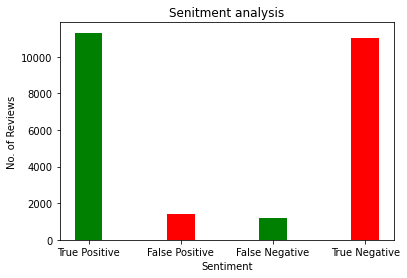

In [91]:
# Ploting the +ve and -ve sentiment
import matplotlib.pyplot as plt
Xaxis = ('True Positive', 'False Positive', 'False Negative', 'True Negative')
Yaxis = (tp, fp, fn, tn)
colors = ('green','red')

plt.bar(Xaxis, Yaxis, color=colors, width=0.3)
plt.xlabel("Sentiment")
plt.ylabel("No. of Reviews")
plt.title("Senitment analysis")
plt.show()

In [92]:
# loss
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(y_pred)

from sklearn.metrics import log_loss
log_loss(y_test, Y)

3.6349065008056134